Mean shift Algorithm attempts to group the data using cluster iteratively and move the data points towards the mode.Here mode refers to high density of datapoints. Unlike K-means cluster, we do not need to mention No of cluster value in Mean Shift Algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

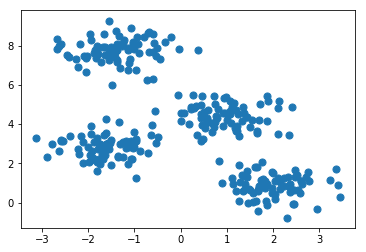

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [10]:
def Euclidean_dist(x, y):
    return np.sqrt(np.sum((x - y)**2))

def neigh_pts(X, center, distance = 5):
    Allo_X = []
    for x in X:
        dist_bet = Euclidean_dist(x, center)
        if dist_bet <= distance:
            Allo_X.append(x)
    return Allo_X

def gaussian_kernel(distance, bandwidth):
    Kernel_value = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return Kernel_value

In [4]:
N_distance = 8
k_band = 5
X_New = np.copy(X)
iteration_Count = 5

In [11]:
Xvar = []
for p in range(iteration_Count):
    for i,x in enumerate(X_New):
        points = neigh_pts(X_New,x,N_distance)
        num,den = 0,0
        for pt in points:
            dist = Euclidean_dist(points,x)
            wgts = gaussian_kernel(dist, k_band)
            num = num+ (wgts * pt)
            den = den+ wgts
        X1 = num/den
        X_New[i] = X1
    Xvar.append(np.copy(X_New))

<Figure size 432x288 with 0 Axes>

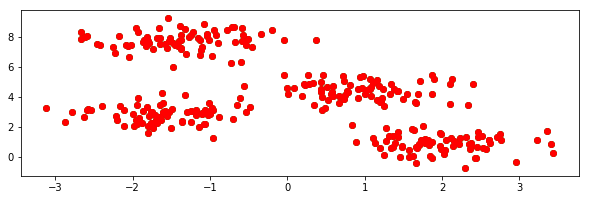

In [19]:
figure = plt.figure()
plt.figure(figsize=(10,25))
plt.subplot(iteration_Count + 2,1,1)
plt.plot(X[:,0], X[:,1], 'go')
plt.plot(X[:,0], X[:,1], 'ro')

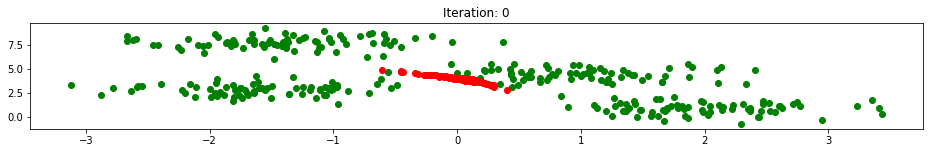

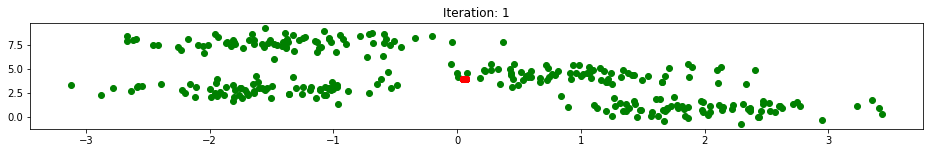

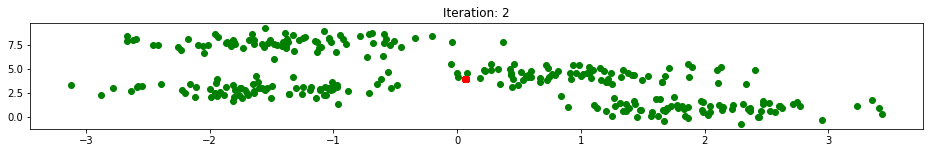

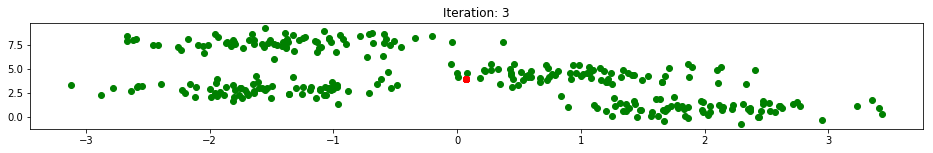

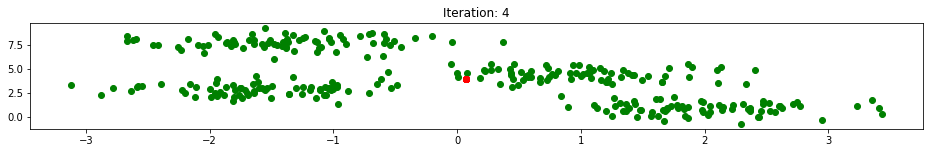

In [27]:
for i in range(iteration_Count):
    fig_val = i + 1
    plt.figure(figsize=(16,16))
    plt.subplot(iteration_Count + 2, 1, fig_val)
    plt.title('Iteration: %d' % (fig_val - 1))
    plt.plot(X[:,0], X[:,1], 'go')
    plt.plot(Xvar[i][:,0], Xvar[i][:,1], 'ro')